# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_json = requests.get(city_url).json()
     
        #city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | tougue
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | broken hill
Processing Record 7 of Set 1 | norrtalje
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | muroto
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | snezhnogorsk
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | samusu
City not found. Skipping...
Processing Record 19 of Set 1 | sergeyevka
Processing Record 20 of Set 1 | ilheus
Processing Record 21 of Set 1 | smithers
Processing Record 22 of Set 1 | hobart
Processi

Processing Record 40 of Set 4 | buraydah
Processing Record 41 of Set 4 | ozgon
City not found. Skipping...
Processing Record 42 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | brigantine
Processing Record 45 of Set 4 | alyangula
Processing Record 46 of Set 4 | luneburg
Processing Record 47 of Set 4 | sovetskiy
Processing Record 48 of Set 4 | havre-saint-pierre
Processing Record 49 of Set 4 | naryan-mar
Processing Record 0 of Set 5 | mayumba
Processing Record 1 of Set 5 | prainha
Processing Record 2 of Set 5 | kangaatsiaq
Processing Record 3 of Set 5 | yamada
Processing Record 4 of Set 5 | buala
Processing Record 5 of Set 5 | ribeira grande
Processing Record 6 of Set 5 | qianan
Processing Record 7 of Set 5 | madisonville
Processing Record 8 of Set 5 | arman
Processing Record 9 of Set 5 | handwara
City not found. Skipping...
Processing Record 10 of Set 5 | sao joao da barra
Processing Record 11 of Set 5 | hambantota

Processing Record 26 of Set 8 | morondava
Processing Record 27 of Set 8 | shache
Processing Record 28 of Set 8 | tatarbunary
Processing Record 29 of Set 8 | sambava
Processing Record 30 of Set 8 | aketi
Processing Record 31 of Set 8 | korla
Processing Record 32 of Set 8 | hanko
Processing Record 33 of Set 8 | ozinki
Processing Record 34 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 35 of Set 8 | presidencia roque saenz pena
Processing Record 36 of Set 8 | bac lieu
Processing Record 37 of Set 8 | antalaha
Processing Record 38 of Set 8 | hazaribag
Processing Record 39 of Set 8 | omboue
Processing Record 40 of Set 8 | horizontina
Processing Record 41 of Set 8 | kavaratti
Processing Record 42 of Set 8 | saiki
Processing Record 43 of Set 8 | beberibe
Processing Record 44 of Set 8 | mopipi
Processing Record 45 of Set 8 | uyuni
Processing Record 46 of Set 8 | cabra
Processing Record 47 of Set 8 | bud
Processing Record 48 of Set 8 | port hardy
Processing Record 49 of Set 8 |

Processing Record 16 of Set 12 | parole
Processing Record 17 of Set 12 | leshukonskoye
Processing Record 18 of Set 12 | rancho palos verdes
Processing Record 19 of Set 12 | khani
Processing Record 20 of Set 12 | gobo
Processing Record 21 of Set 12 | saskylakh
Processing Record 22 of Set 12 | camacha
Processing Record 23 of Set 12 | egvekinot
Processing Record 24 of Set 12 | mersing
Processing Record 25 of Set 12 | los llanos de aridane
Processing Record 26 of Set 12 | porangatu
Processing Record 27 of Set 12 | abdanan
Processing Record 28 of Set 12 | ife
Processing Record 29 of Set 12 | burica
City not found. Skipping...
Processing Record 30 of Set 12 | yershov
Processing Record 31 of Set 12 | sierra vista
Processing Record 32 of Set 12 | bolshegrivskoye
City not found. Skipping...
Processing Record 33 of Set 12 | kloulklubed
Processing Record 34 of Set 12 | inirida
Processing Record 35 of Set 12 | grand centre
City not found. Skipping...
Processing Record 36 of Set 12 | urumqi
Process

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City": cities, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# Show Record Count
city_data_df.count()

City          614
Lat           614
Lng           614
Max Temp      614
Humidity      614
Cloudiness    614
Wind Speed    614
Country       614
Date          614
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988
1,tougue,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988
2,georgetown,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988
3,bluff,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988
4,rikitea,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khatanga,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988
1,tougue,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988
2,georgetown,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988
3,bluff,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988
4,rikitea,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

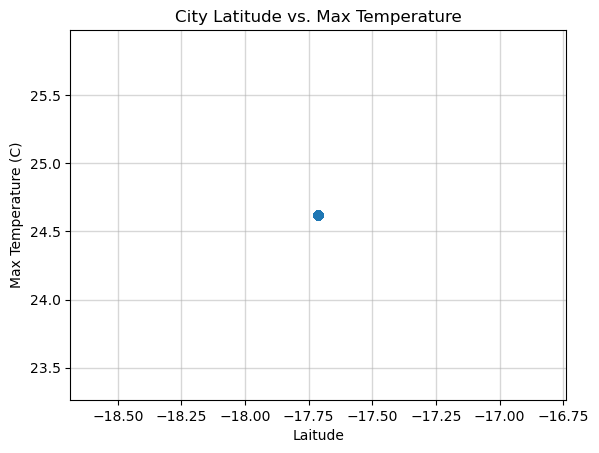

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

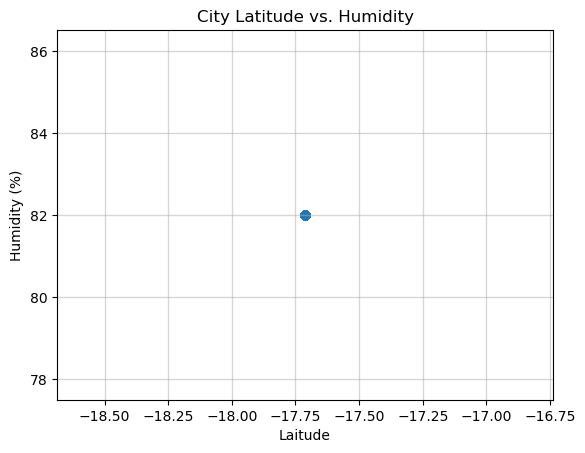

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

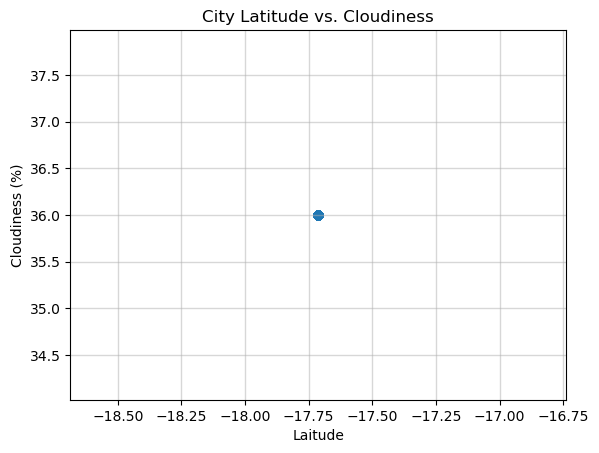

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

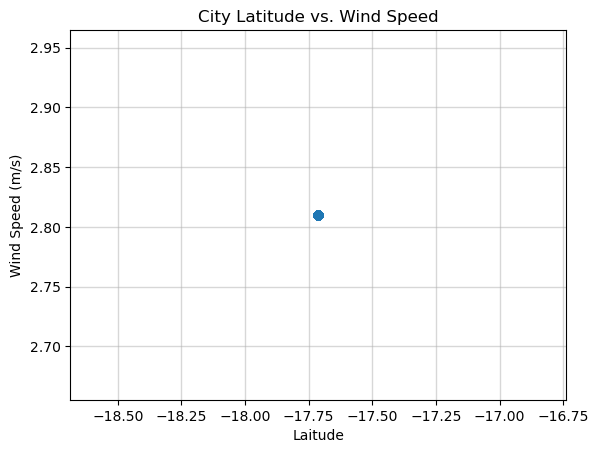

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values - slope * x_values + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    correlation = st.pearsonr(x_values, y_values)
    return line_eq
    

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khatanga,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988
1,tougue,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988
2,georgetown,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988
3,bluff,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988
4,rikitea,-17.7125,-39.2481,24.62,82,36,2.81,BR,1675912988


###  Temperature vs. Latitude Linear Regression Plot

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

ValueError: Inputs must not be empty.

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

ValueError: Cannot calculate a linear regression if all x values are identical

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

ValueError: Inputs must not be empty.

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

ValueError: Cannot calculate a linear regression if all x values are identical

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

ValueError: Inputs must not be empty.

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

ValueError: Cannot calculate a linear regression if all x values are identical

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

ValueError: Inputs must not be empty.

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

ValueError: Cannot calculate a linear regression if all x values are identical

**Discussion about the linear relationship:** YOUR RESPONSE HERE